# **(Data Visualization)**

## Objectives

Fetch and load the Kaggle dataset into the notebook for exploration and modeling.
Clean the data, handle missing values.
Which variables are significant in predicting the price of a car.
Understand the pricing dynamics of a new market.

## Inputs
Dataset file downloaded from Kaggle.
Python environment with essential libraries installed (pandas, numpy, matplotlib, seaborn, plotly).

## Outputs
Charts and graphs to visualise key metrics.
Report describing findings and model insights.




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\DataAnalysisProjects\\car-price-analysis\\car-price-analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\DataAnalysisProjects\\car-price-analysis\\car-price-analysis'

# Section 1

Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



Import cleaned Dataset

In [5]:
cars_df = pd.read_csv("dataset/clean/carprice.csv")
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Data Visualization 

<Axes: title={'center': 'Models per brand'}, xlabel='Count', ylabel='carbrand'>

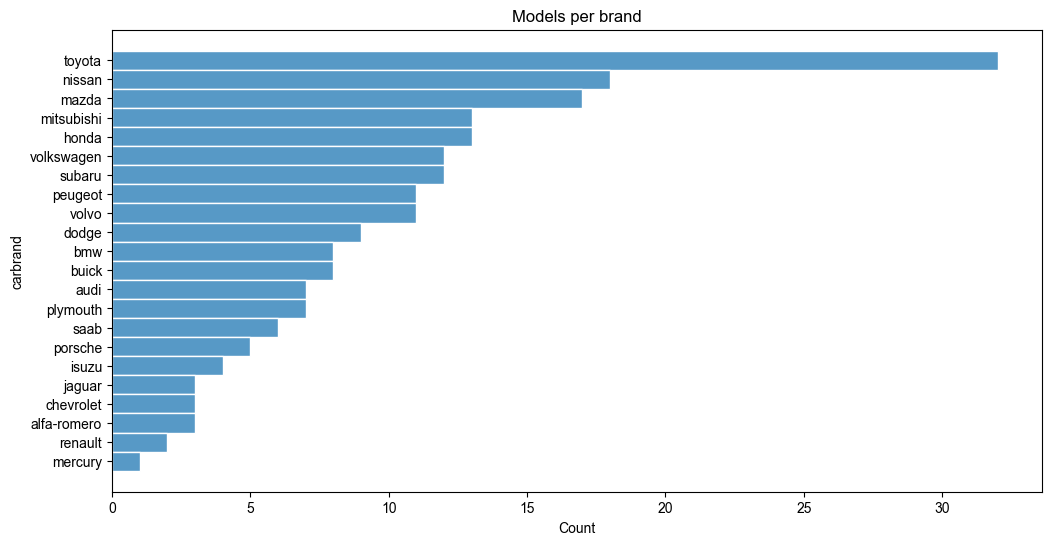

In [6]:
#Chart 1 : car models per brand
brand_counts = cars_df['carbrand'].value_counts().sort_values(ascending=False)
cars_df['carbrand'] = pd.Categorical(cars_df['carbrand'], categories=brand_counts.index, ordered=True)
fig, axes = plt.subplots(figsize=(12, 6))
sns.set_theme(style="whitegrid")
plt.title('Models per brand')
sns.histplot(data=cars_df, y="carbrand")

The chart shows that while Toyota has the most models, its average price is among the lowest. Similarly, Nissan also has a high number of models, but a low average price. This suggests a large number of lower-priced offerings from these brands.
Brands like Jaguar, Porsche, BMW, and Buick, which have high average prices, have a relatively low number of models.

---

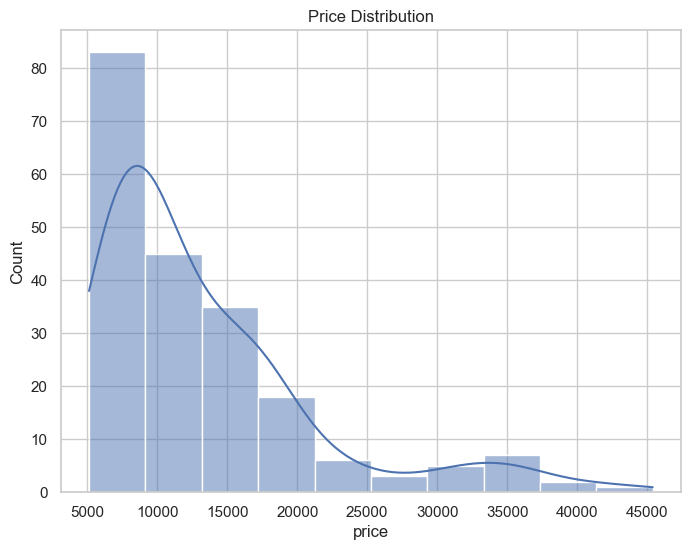

In [7]:
#Chart 2 : cars price distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=cars_df['price'], bins= 10,kde=True)
plt.title('Price Distribution')
plt.show()

Right-skewed (positively skewed) distribution.
Most cars are priced between $5,000 and $20,000.
A smaller portion of cars has prices above $30,000, with some reaching over $45,000.
The skewness indicates a few very high-priced vehicles

---

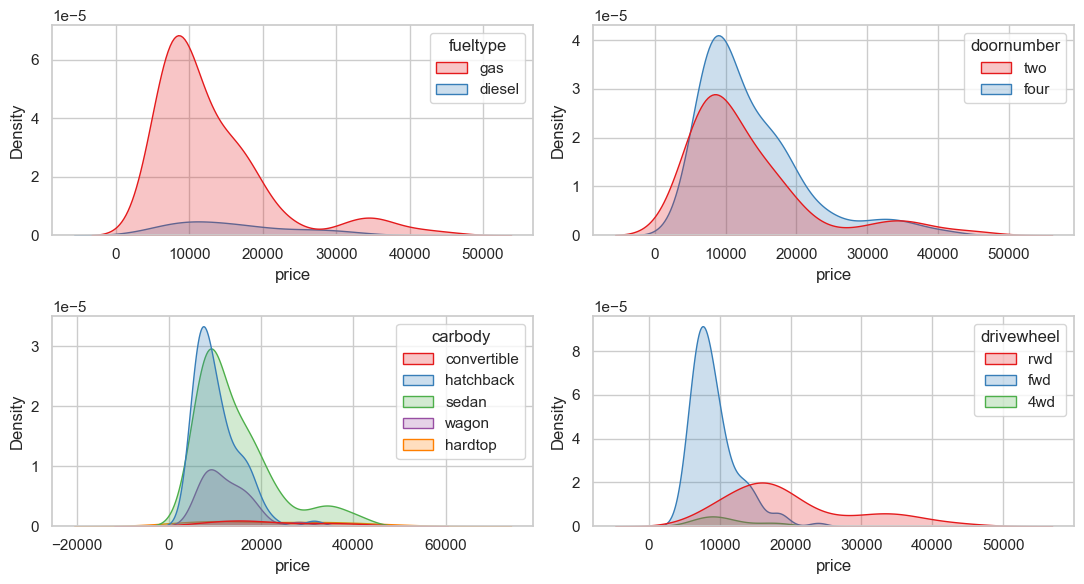

In [8]:
#Chart 3 : distribution of (fuel type, doornumber, carbody , drivewheel) and the price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize =(11,6))
sns.kdeplot(data=cars_df, x='price',hue='fueltype',ax=axes[0,0],fill=True,  palette='Set1')
sns.kdeplot(data=cars_df, x='price',hue='doornumber',ax=axes[0,1],fill=True,  palette='Set1')
sns.kdeplot(data=cars_df, x='price',hue='carbody',ax=axes[1,0],fill=True,  palette='Set1')
sns.kdeplot(data=cars_df, x='price',hue='drivewheel',ax=axes[1,1],fill=True, palette='Set1')
plt.tight_layout()
plt.show()


Fuel type:
Gas cars dominate the lower-to-mid price range, while diesel prices are slightly higher but less frequent.

Door number:
Four-door cars tend to have higher prices than two-door cars.

Car body:
Convertibles and hardtops have higher price ranges, while hatchbacks cluster in the low-price range.

Drive wheel:
FWD cars are mostly in the low price range. RWD cars show a broader distribution with higher price peaks.

---

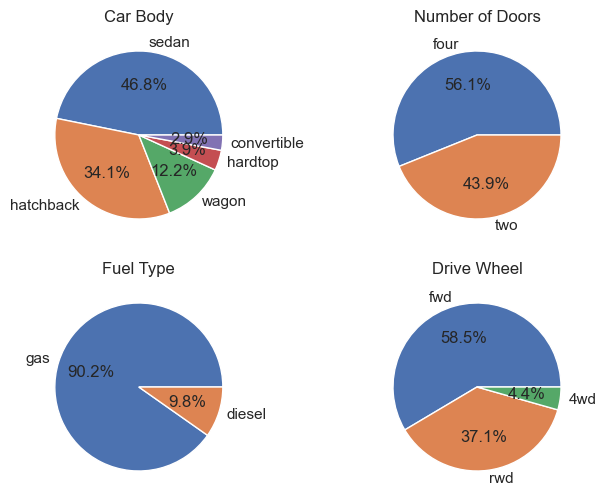

In [9]:
#Chart 4 : percentage of (car body, number of doors, fuel type, drive wheel) to the price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize =(8,6))
carbody = cars_df.value_counts('carbody',normalize=True)
doornumber = cars_df.value_counts('doornumber',normalize=True)
fueltype = cars_df.value_counts('fueltype',normalize=True)
drivewheel = cars_df.value_counts('drivewheel',normalize=True)
axes[0,0].pie(x=carbody, labels=carbody.index, autopct='%1.1f%%')
axes[0,0].set_title('Car Body')
axes[0,1].pie(x=doornumber, labels=doornumber.index, autopct='%1.1f%%')
axes[0,1].set_title('Number of Doors')
axes[1,0].pie(x=fueltype, labels=fueltype.index, autopct='%1.1f%%')
axes[1,0].set_title('Fuel Type')
axes[1,1].pie(x=drivewheel, labels=drivewheel.index, autopct='%1.1f%%')
axes[1,1].set_title('Drive Wheel')
plt.show()



Car Body:
Most common: Sedan (46.8%) and Hatchback (34.1%).
Rare: Convertible and Hardtop (around 3% each).

Number of Doors:
Almost evenly split, but slightly more 4-door cars (56.1%) than 2-door cars.

Fuel Type:
Gas (90.2%), with only 9.8% diesel.

Drive Wheel:
Majority are FWD (58.5%), followed by RWD (37.1%), and a small proportion of 4WD (4.4%).

---

In [10]:
# Chart 5: top 20 car models by average price
n = 20
avg_car_price = cars_df.groupby('CarName')['price'].mean().sort_values(ascending=False)
top_cars = avg_car_price.head(n)
fig = go.Figure(go.Bar(
    x=top_cars.values[::-1],
    y=top_cars.index[::-1],
    orientation='h',
    marker=dict(color='royalblue')
))
fig.update_layout(
    title=f'Top {n} Car Models by Average Price',
    xaxis_title='Average Price',
    yaxis_title='Car Model',
    height=600
)
fig.show()

The most expensive single car model is the Buick Regal Sport Coupe (Turbo), with the BMW X5, Buick Century Special, and Porsche Boxster also ranking highly.

---

In [11]:
# Chart 6: car brands average price
avg_brand_price = cars_df.groupby('carbrand')['price'].mean().sort_values(ascending=False)

fig = go.Figure(go.Bar(
    x=avg_brand_price.values[::-1],
    y=avg_brand_price.index[::-1],
    orientation='h',
    marker=dict(color='royalblue')
))
fig.update_layout(
    title='Car Brands Average Price',
    xaxis_title='Average Price',
    yaxis_title='Car Brand',
    height=600
)
fig.show()

C:\Users\amron\AppData\Local\Temp\ipykernel_25956\1770109579.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



The charts "Car Brands Average Price" and "Top 20 Car Models by Average Price" show that Jaguar, Buick, Porsche, and BMW are the car brands with the highest average prices.
Specifically, Jaguar has the highest average price, followed closely by Buick and Porsche.

---

In [12]:
# Chart 7:  average price depending on car body
avg_carbody_price = cars_df.groupby('carbody')['price'].mean().sort_values(ascending=False)
fig = go.Figure(go.Bar(
    x=avg_carbody_price.values[::-1],
    y=avg_carbody_price.index[::-1],
    orientation='h',
    marker=dict(color='royalblue')
))
fig.update_layout(
    title='Average Price Depending On Car Body',
    xaxis_title='Average Price',
    yaxis_title='Car Body',
    height=500
)
fig.show()

Hardtop and convertible cars have the highest average prices, while sedans, wagons, and hatchbacks are more affordable.

---

In [13]:
# Chart 8:  average price depending on citympg
avg_citympg_price = cars_df.groupby('citympg')['price'].mean().sort_values(ascending=False)
fig = go.Figure(go.Bar(
    x=avg_citympg_price.values[::-1],
    y=avg_citympg_price.index[::-1],
    orientation='h',
    marker=dict(color='royalblue')
))
fig.update_layout(
    title='Average Price Depending On City Mpg',
    xaxis_title='Average Price',
    yaxis_title='City Mpg',
    height=600
)
fig.show()

 Cars with lower city MPG (e.g., 15–20 mpg) tend to have significantly higher average prices compared to those with higher MPG (e.g., 30–45 mpg).

---

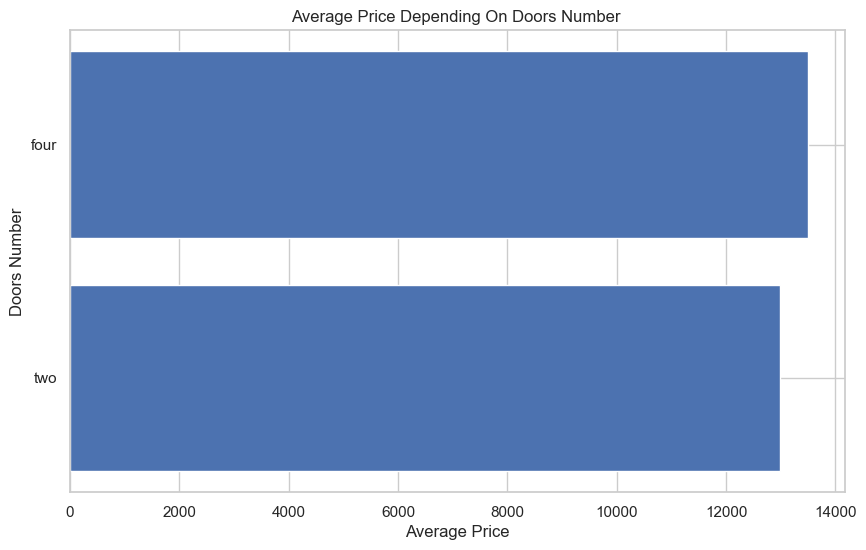

In [14]:
# Chart 9:  average price depending on door number
avg_doornumber_price = cars_df.groupby('doornumber')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(avg_doornumber_price.index[::-1], avg_doornumber_price.values[::-1]) 
plt.title(f'Average Price Depending On Doors Number ')
plt.xlabel('Average Price')
plt.ylabel('Doors Number')
plt.show()

Cars with four doors have a slightly higher average price than cars with two doors.

---

C:\Users\amron\AppData\Local\Temp\ipykernel_25956\4048340630.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



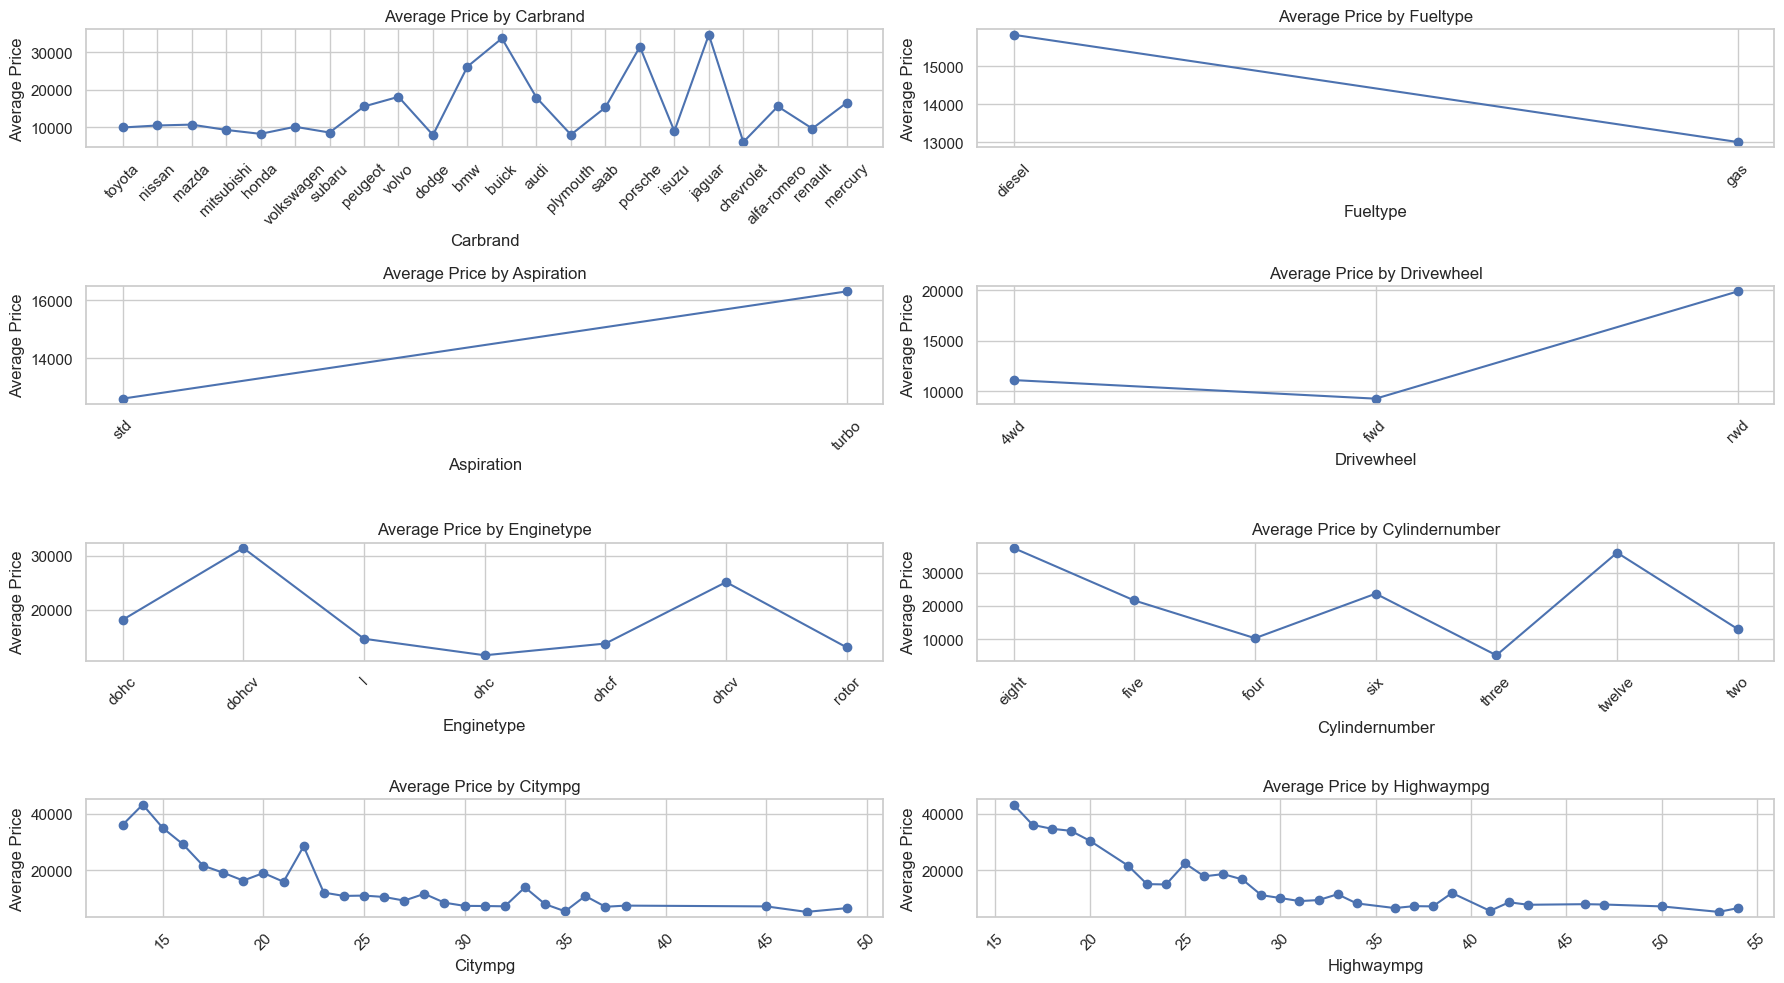

In [15]:
# Chart 10:  correlation between car functional features and price
categorical_cols = ['carbrand', 'fueltype', 'aspiration', 'drivewheel', 'enginetype', 'cylindernumber', 'citympg', 'highwaympg']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    avg_price = cars_df.groupby(col)['price'].mean().reset_index()
    axes[i].plot(avg_price[col], avg_price['price'], marker='o')
    axes[i].set_title(f'Average Price by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Average Price')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Car brand:
Premium brands like BMW, Porsche, and Jaguar command higher prices. Economy brands like Toyota, Nissan, and Honda have lower average prices.

Fuel type:
Diesel cars have slightly higher average prices than gas.

Aspiration:
Turbocharged engines have slightly higher average prices compared to standard, though the difference isn’t huge.

Drive wheel:
Rear-wheel drive (RWD) cars are significantly more expensive on average. Front-wheel drive (FWD) is generally cheaper.

Engine type & cylinder number:
Complex/more powerful engines (e.g., DOHC, more cylinders) are correlated with higher prices.
Cars with 12 cylinders have the highest average price, followed by eight-cylinder models.

---

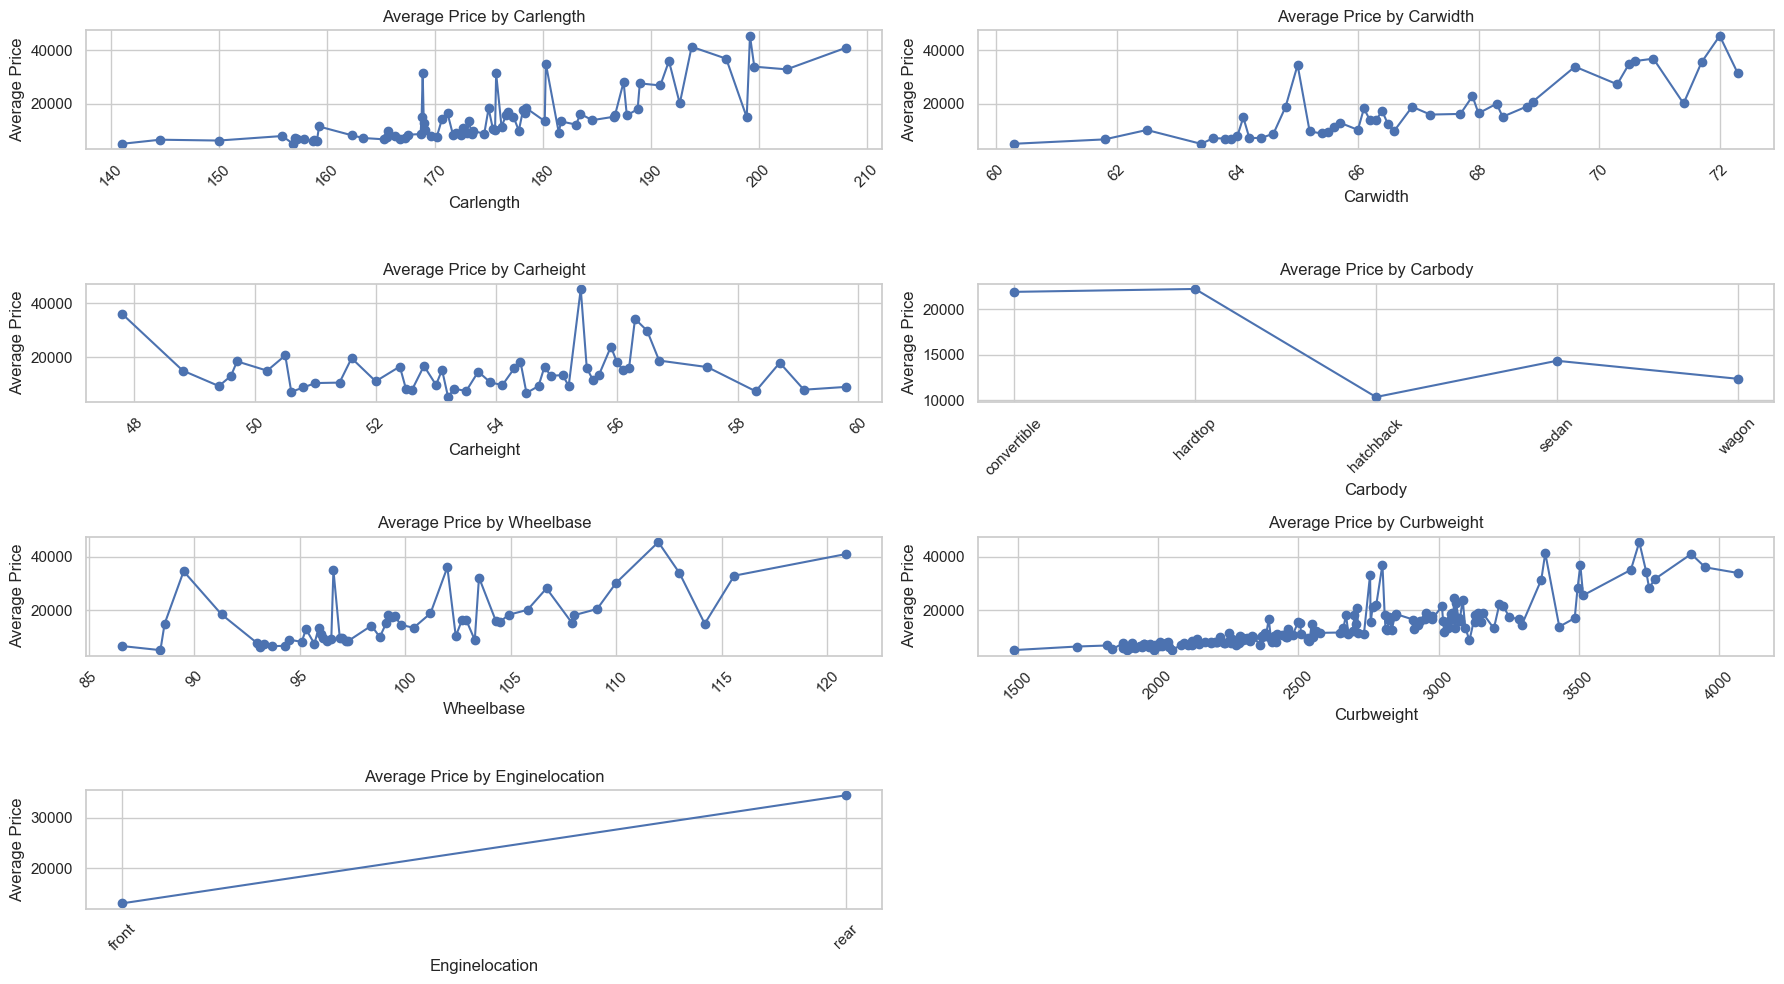

In [16]:
# Chart 11:  correlation between car features and price
categorical_cols = ['carlength', 'carwidth', 'carheight','carbody', 'wheelbase', 'curbweight','enginelocation']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    avg_price = cars_df.groupby(col)['price'].mean().reset_index()
    axes[i].plot(avg_price[col], avg_price['price'], marker='o')
    axes[i].set_title(f'Average Price by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Average Price')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the first two sets of line plots:

Car length, width, and wheelbase:
Generally, longer, wider, and larger wheelbase cars tend to have higher prices, though there are fluctuations likely due to brand/model differences.

Car height:
Price does not show a strong correlation with height.

Curb weight:
Strong positive relationship, heavier cars are generally more expensive

Engine location:
Rear-engine cars have a significantly higher average price, but these are rare.

City and highway MPG:
Negative correlation, more fuel-efficient cars tend to be cheaper.

---

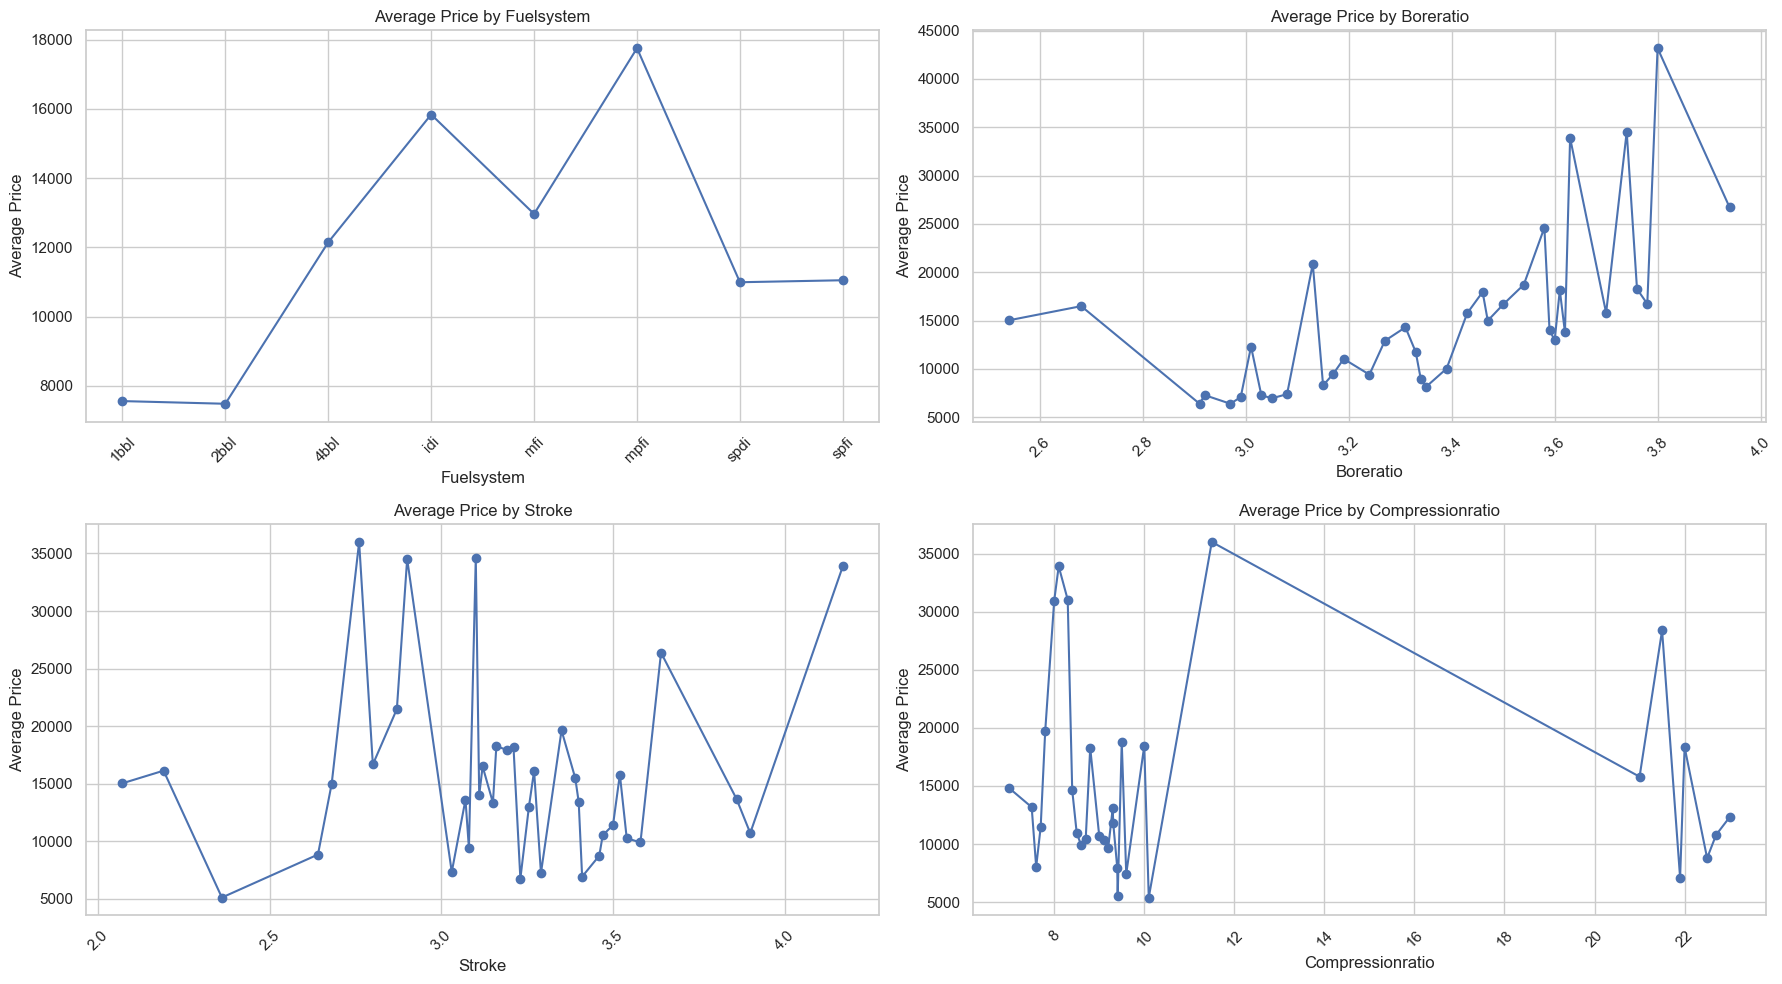

In [17]:
# Chart 12:  correlation between car features and price
categorical_cols = ['fuelsystem', 'boreratio', 'stroke', 'compressionratio']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    avg_price = cars_df.groupby(col)['price'].mean().reset_index()
    axes[i].plot(avg_price[col], avg_price['price'], marker='o')
    axes[i].set_title(f'Average Price by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Average Price')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)
plt.tight_layout()
plt.show()

 Cars with the "idi" fuel system have the highest average price, followed by "mpfi". Cars with a "1bbl" fuel system have the lowest average price.

There isn't a simple linear relationship. The average price fluctuates significantly across different values for these engine specifications.

For "Boreratio," the average price is generally lower in the 3.0 to 3.2 range and significantly higher for certain values, particularly above 3.6.

The "Stroke" and "Compressionratio" charts also show significant price variations, with certain specific values corresponding to very high average prices (e.g., Compressionratio around 9.0 and 10.0, and Stroke values around 3.0 and 3.5). This suggests that specific engine configurations, rather than a broad range, are associated with premium pricing.

# Section 2

Key Takeaways for the Project:


Price Variation by Brand: The most expensive car brands on average are Jaguar, Buick, Porsche, and BMW. In contrast, brands like Toyota and Nissan, which have a much larger number of models, have a significantly lower average price.

Price Variation by Car Type: Hardtop and convertible car body styles have the highest average prices, while sedans and hatchbacks are more affordable.

Price Variation by Fuel System: Cars with "idi" and "mpfi" fuel systems are, on average, the most expensive, while cars with "1bbl" systems are the least expensive.

Engine Specifications and Price: There is no simple linear correlation between average price and engine specifications like bore ratio, stroke, or compression ratio. Instead, the charts show that specific, non-contiguous values for these parameters are associated with much higher average prices, suggesting that specialized or high-performance engine configurations command a premium.

Most Expensive Models: The most expensive individual car models are the Buick Regal Sport Coupe (Turbo), the BMW X5, and the Buick Century Special. These models belong to brands that have a high average price.


Strongest price predictors:
Curb weight, car width/length, engine type, cylinder number, and drive wheel show clear patterns with price.

Market segmentation:
Luxury sports models (rear engine, RWD, more cylinders) stand apart from economy cars (FWD, smaller dimensions, higher MPG).

City MPG is a strong negative predictor of price — higher efficiency usually means lower price.

Body style, fuel type, and drive wheel could serve as important categorical predictors when properly encoded.

The US market is clearly segmented. There's a high-margin luxury segment dominated by brands like Jaguar, Buick, Porsche, and BMW, and a high-volume, lower-priced segment led by brands like Toyota and Nissan. The company should decide whether to compete in the luxury space with a few, high-priced, high-margin models or in the economy space with a wider range of lower-priced models.

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [18]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block (553063055.py, line 5)